## Importing Libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%tensorflow_version 2.x
import tensorflow as tf
import os
import scipy
import keras
import random
import cv2
from skimage.io import imread, imshow, imread_collection, concatenate_images
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import concatenate,Activation,Reshape
from tensorflow.keras.layers import Conv2D,Conv3D, UpSampling2D, InputLayer, Conv2DTranspose, Input
from tensorflow.keras.layers import BatchNormalization
from PIL import Image, ImageFile
from skimage.color import rgb2lab, lab2rgb, rgb2gray, gray2rgb
from skimage.transform import resize
from skimage.io import imsave
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

TensorFlow 2.x selected.


Using TensorFlow backend.


## Importing Images

Importing Files in Google Drive

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


Changing Directory

In [0]:
DatasetDirectory = os.getcwd() + '/My Drive/Epoch/Image Colorization'
os.chdir(DatasetDirectory)
print (os.getcwd())

/gdrive/My Drive/Epoch/Image Colorization


Importing .npy files

In [0]:
'''
Gray_Images = np.load('gray_scale.npy')
Images_Lab = np.zeros((Gray_Images.shape[0],224,224,2))
Images_Lab[0:10000] = np.load('ab1.npy')
Images_Lab[10000:20000] = np.load('ab2.npy')
Images_Lab[20000:] = np.load('ab3.npy')

Gray_Images = Gray_Images.reshape(Gray_Images.shape+(1,))
'''

"\nGray_Images = np.load('gray_scale.npy')\nImages_Lab = np.zeros((Gray_Images.shape[0],224,224,2))\nImages_Lab[0:10000] = np.load('ab1.npy')\nImages_Lab[10000:20000] = np.load('ab2.npy')\nImages_Lab[20000:] = np.load('ab3.npy')\n\nGray_Images = Gray_Images.reshape(Gray_Images.shape+(1,))\n"

Import Images

In [0]:
path = DatasetDirectory + '/Images'
Images = os.listdir(path)
os.chdir(path)

Gray_Images = []
RGB_Images = []
x = 0
for img in Images:
    if x%50 == 0:
        print ("{}% of Data Converted".format(x*100/len(Images)))
    try:
        img = imread(img)
        img = resize(img,(224,224))
        if len(img.shape) == 3:
            Gray_Images.append(img[:,:,0])
            RGB_Images.append(img)
    except:
        print ("Failed to Convert, ", img)
    x = x+1

0.0% of Data Converted
1.0926573426573427% of Data Converted
2.1853146853146854% of Data Converted
3.277972027972028% of Data Converted
4.370629370629371% of Data Converted
5.463286713286713% of Data Converted
6.555944055944056% of Data Converted
7.648601398601398% of Data Converted
8.741258741258742% of Data Converted
9.833916083916083% of Data Converted
10.926573426573427% of Data Converted
12.01923076923077% of Data Converted
13.111888111888112% of Data Converted
14.204545454545455% of Data Converted
15.297202797202797% of Data Converted
16.38986013986014% of Data Converted
17.482517482517483% of Data Converted
18.575174825174827% of Data Converted
19.667832167832167% of Data Converted
20.76048951048951% of Data Converted
21.853146853146853% of Data Converted
22.945804195804197% of Data Converted
24.03846153846154% of Data Converted
25.13111888111888% of Data Converted
26.223776223776223% of Data Converted
27.316433566433567% of Data Converted
28.40909090909091% of Data Converted
29

Visualisation of Data

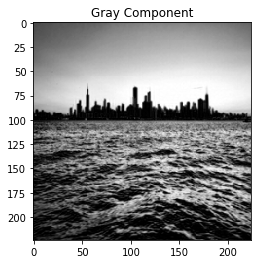

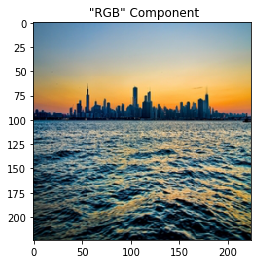

In [0]:
Gray_Images = np.array(Gray_Images)
RGB_Images = np.array(RGB_Images)

Gray_Images = Gray_Images.reshape(Gray_Images.shape+(1,))
plt.imshow(Gray_Images[0,:,:,0],cmap='gray')
plt.title('Gray Component')
plt.show()

plt.imshow(RGB_Images[0])
plt.title(' "RGB" Component')
plt.show()

## Create a Model

We would create a Encoder and Decoder Part for the Model.

In [0]:
def Encoder_Decoder_Model():
    tf.keras.backend.clear_session()
    '''
    # Encoder
    Encoder_Input = Input(shape=(224,224,1))
    x = Conv2D(64, (3,3), activation='relu', padding='same', use_bias = True,bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05),strides=2)(Encoder_Input)
    x = Conv2D(128, (3,3), activation='relu', padding='same', use_bias = True,bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05),strides=2)(x)
    x = Conv2D(256, (3,3), activation='relu', padding='same', use_bias = True,bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05),strides=1)(x)
    x = Conv2D(512, (3,3), activation='relu', padding='same', use_bias = True,bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05),strides=1)(x)
    x = Conv2D(512, (3,3), activation='relu', padding='same', use_bias = True,bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05),strides=1)(x)
    Encoder_Output = Conv2D(512, (3,3), activation='relu', padding='same', use_bias = True,bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05),strides=1)(x)

    x = Conv2D(512, (3,3), activation='relu', padding='same', use_bias = True,bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05),strides=1)(Encoder_Output)
    x = UpSampling2D((2,2))(x)
    x = Conv2D(256, (3,3), activation='relu', padding='same', use_bias = True,bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05),strides=1)(x)
    x = Conv2D(64, (3,3), activation='relu', padding='same', use_bias = True,bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05),strides=1)(x)
    x = Conv2D(16, (3,3), activation='relu', padding='same', use_bias = True,bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05),strides=1)(x)
    x = Conv2D(2, (3,3), activation='relu', padding='same', use_bias = True,bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05),strides=1)(x)
    Decoder_Output = UpSampling2D((2,2))(x)

    '''
    
    Encoder_Input = Input(shape=(224,224,1))
    x = Conv2D(12, (3,3), activation='relu', padding='valid', use_bias = True,bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05),strides=1)(Encoder_Input)
    x = Conv2D(12, (3,3), activation='relu', padding='valid', use_bias = True,bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05),strides=1)(x)
    x = Conv2DTranspose(12, (3,3), activation='relu', padding='valid', use_bias = True,bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05),strides=1)(x)
    Decoder_Output = Conv2DTranspose(3, (3,3), activation='relu', padding='valid', use_bias = True,bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05),strides=1)(x)
    
    model = Model(inputs=Encoder_Input, outputs=Decoder_Output)
    
    return model

In [0]:
Model = Encoder_Decoder_Model()
Model.compile(optimizer='adam', loss= "mse" , metrics=['accuracy'])
Model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 12)      120       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 12)      1308      
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 222, 222, 12)      1308      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 224, 224, 3)       327       
Total params: 3,063
Trainable params: 3,063
Non-trainable params: 0
_________________________________________________________________


## Train Model

In [0]:
Model.fit(Gray_Images,RGB_Images,validation_split=0.1,epochs=30,batch_size=2)

Train on 4016 samples, validate on 447 samples
Epoch 1/30
4016/4016 [==============================] - 25s 6ms/sample - loss: 0.0236 - accuracy: 0.4317 - val_loss: 0.0145 - val_accuracy: 0.4183
Epoch 2/30
4016/4016 [==============================] - 10s 3ms/sample - loss: 0.0168 - accuracy: 0.4321 - val_loss: 0.0145 - val_accuracy: 0.4902
Epoch 3/30
4016/4016 [==============================] - 10s 3ms/sample - loss: 0.0166 - accuracy: 0.4356 - val_loss: 0.0153 - val_accuracy: 0.4912
Epoch 4/30
4016/4016 [==============================] - 10s 3ms/sample - loss: 0.0166 - accuracy: 0.4357 - val_loss: 0.0151 - val_accuracy: 0.4267
Epoch 5/30
4016/4016 [==============================] - 11s 3ms/sample - loss: 0.0164 - accuracy: 0.4374 - val_loss: 0.0147 - val_accuracy: 0.3619
Epoch 6/30
4016/4016 [==============================] - 11s 3ms/sample - loss: 0.0165 - accuracy: 0.4404 - val_loss: 0.0142 - val_accuracy: 0.4551
Epoch 7/30
4016/4016 [==============================] - 10s 3ms/sample 

In [0]:
os.chdir(DatasetDirectory)
Model.save("RGB_Model.h5")

## Testing Model

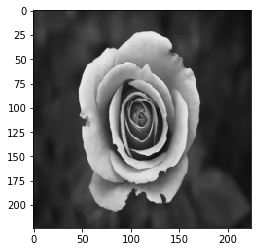

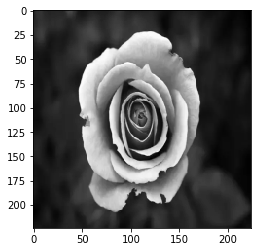

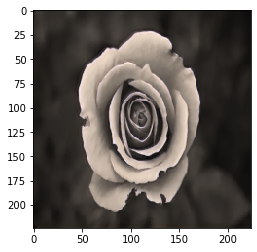

In [0]:
T = img_to_array(load_img('Rose.jpg'))
T = resize(T,(224,224))

plt.imshow(T/255.0)
plt.show()

Gray_Image = T[:,:,0]

plt.imshow(Gray_Image,cmap='gray')
plt.show()

Gray_Image = Gray_Image.reshape((1,)+Gray_Image.shape+(1,))
P = Model.predict(Gray_Image)

plt.imshow(P[0]/255.0)
plt.show()

imsave("Rose_Predicted_RGB_Model.jpg",P[0]/255.0)

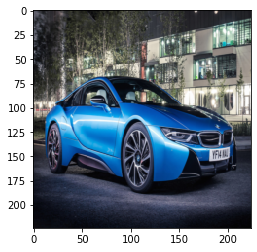

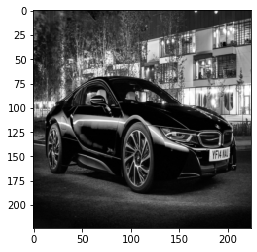

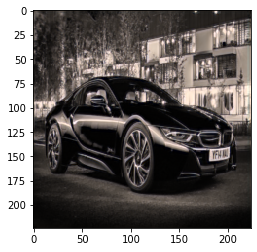

In [0]:
T = img_to_array(load_img('BlueBMW.jpg'))
T = resize(T,(224,224))

plt.imshow(T/255.0)
plt.show()

Gray_Image = T[:,:,0]

plt.imshow(Gray_Image,cmap='gray')
plt.show()

Gray_Image = Gray_Image.reshape((1,)+Gray_Image.shape+(1,))
P = Model.predict(Gray_Image)

plt.imshow(P[0]/255.0)
plt.show()

imsave("BlueBMW_Predicted_RGB_Model.jpg",P[0]/255.0)

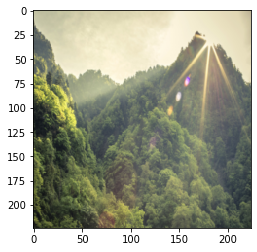

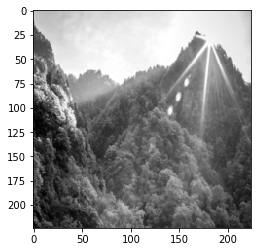

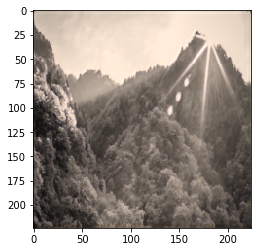

In [0]:
T = img_to_array(load_img('Nature.jpg'))
T = resize(T,(224,224))

plt.imshow(T/255.0)
plt.show()

Gray_Image = T[:,:,0]

plt.imshow(Gray_Image,cmap='gray')
plt.show()

Gray_Image = Gray_Image.reshape((1,)+Gray_Image.shape+(1,))
P = Model.predict(Gray_Image)

plt.imshow(P[0]/255.0)
plt.show()

imsave("Nature_Predicted_RGB_Model.jpg",P[0]/255.0)

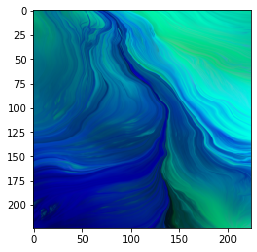

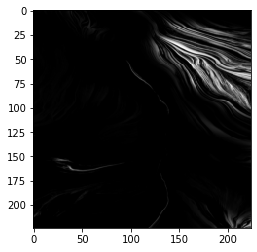

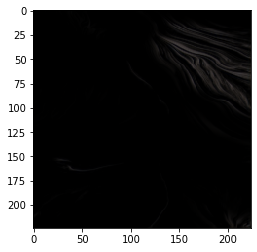

In [0]:
T = img_to_array(load_img('Oppo.png'))
T = resize(T,(224,224))

plt.imshow(T/255.0)
plt.show()

Gray_Image = T[:,:,0]

plt.imshow(Gray_Image,cmap='gray')
plt.show()

Gray_Image = Gray_Image.reshape((1,)+Gray_Image.shape+(1,))
P = Model.predict(Gray_Image)

plt.imshow(P[0]/255.0)
plt.show()

imsave("Oppo_Predicted_RGB_Model.jpg",P[0]/255.0)